In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import timedelta
from datetime import datetime

In [2]:
gen_1 = pd.read_csv('Plant_1_Generation_Data.csv')
sen_1 = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

In [3]:
gen_1.head(3)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0


In [4]:
sen_1.head(3)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0


### پیش پردازش داده های جنریشن

In [5]:
print(gen_1.shape, '\n***********')
gen_1.info()

(68778, 7) 
***********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [6]:
print('number of null value:')
print(gen_1.isna().sum())

number of null value:
DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64


In [7]:
found = gen_1[['DATE_TIME', 'SOURCE_KEY']].groupby('DATE_TIME')
if all(found.count() == found.nunique()):
    print("No duplicates SOURCE_KEY found within each DATE_TIME")
else:
    print("Duplicates SOURCE_KEY found within a DATE_TIME group")

No duplicates SOURCE_KEY found within each DATE_TIME


In [8]:
gen_1.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [9]:
#print(gen_1['SOURCE_KEY'].unique().size)
#print(gen_1['PLANT_ID'].unique().size)
gen_cols  = gen_1.columns.to_list()
for col in gen_cols:
    print('\n', col, ':   ', len(gen_1[col].unique()))


 DATE_TIME :    3158

 PLANT_ID :    1

 SOURCE_KEY :    22

 DC_POWER :    32909

 AC_POWER :    32686

 DAILY_YIELD :    29900

 TOTAL_YIELD :    37267


In [10]:
type(gen_1['DATE_TIME'][0])
gen_1['DATE_TIME'] = pd.to_datetime(gen_1["DATE_TIME"])

In [11]:
df1 = gen_1.drop(columns=['PLANT_ID'])

ستون سورس باید عددی شود که بعدا این کار را انجام میدهیم

### پیش پردازش داده های سنسور

In [12]:
print(sen_1.shape, '\n***********')
sen_1.info()

(3182, 6) 
***********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [13]:
print('number of null value:')
print(sen_1.isna().sum())

number of null value:
DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


In [14]:
sen_1.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


In [15]:
sen_cols  = sen_1.columns.to_list()
for col in sen_cols:
    print('\n', col, ':   ', len(sen_1[col].unique()))


 DATE_TIME :    3182

 PLANT_ID :    1

 SOURCE_KEY :    1

 AMBIENT_TEMPERATURE :    3182

 MODULE_TEMPERATURE :    3182

 IRRADIATION :    1758


In [16]:
type(sen_1['DATE_TIME'][0])
sen_1['DATE_TIME'] = pd.to_datetime(sen_1["DATE_TIME"])

In [17]:
df2 = sen_1.drop(columns=['PLANT_ID', 'SOURCE_KEY'])

## outlier detection

In [18]:
df1.describe()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,3147.426211,307.802752,3295.968737,6.978712e+06
std,4036.457169,394.396439,3145.178309,4.162720e+05
min,0.000000,0.000000,0.000000,6.183645e+06
25%,0.000000,0.000000,0.000000,6.512003e+06
50%,429.000000,41.493750,2658.714286,7.146685e+06
75%,6366.964286,623.618750,6274.000000,7.268706e+06
max,14471.125000,1410.950000,9163.000000,7.846821e+06


In [19]:
df2.describe()

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.000000,3182.000000,3182.000000
mean,25.531606,31.091015,0.228313
std,3.354856,12.261222,0.300836
min,20.398505,18.140415,0.000000
25%,22.705182,21.090553,0.000000
50%,24.613814,24.618060,0.024653
75%,27.920532,41.307840,0.449588
max,35.252486,65.545714,1.221652


on AC_POWER

In [36]:
ZSCORE_AZ = (df1['AC_POWER'] - df1['AC_POWER'].mean())/df1['AC_POWER'].std()
outliers_AC = df1[(ZSCORE_AZ < -3) | (ZSCORE_AZ > 3)]
len(outliers_AC)

0

[Text(0.5, 1.0, 'Box Plot of AC')]

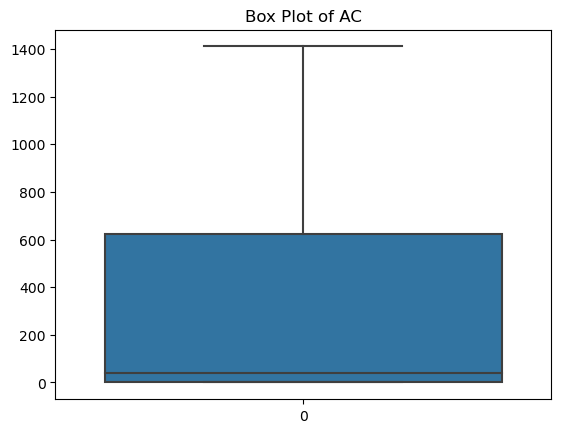

In [27]:
sns.boxplot(data=df1['AC_POWER']).set(title="Box Plot of AC")

In [30]:
AC_describe = df1['AC_POWER'].describe()
IQR_AC = AC_describe['75%'] - AC_describe['25%']
lower_limit = AC_describe['25%'] - 1.5*IQR_AC
upper_limit = AC_describe['75%'] + 1.5*IQR_AC
outliers_AC2 = df1[(df1['AC_POWER'] < lower_limit) | (df1['AC_POWER'] > upper_limit)]
len(outliers_AC2)

0

result: no outlier on AC_POWER

on TOTAL_YIELD

[Text(0.5, 1.0, 'Box Plot of TOTAL_YIELD')]

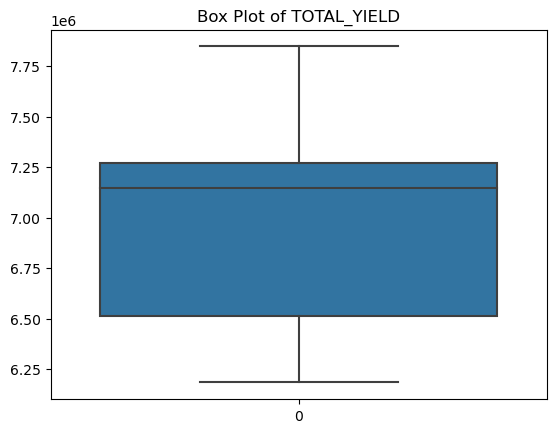

In [31]:
sns.boxplot(data=df1['TOTAL_YIELD']).set(title="Box Plot of TOTAL_YIELD")

In [32]:
Total_describe = df1['TOTAL_YIELD'].describe()
IQR_total = Total_describe['75%'] - Total_describe['25%']
lower_limit = Total_describe['25%'] - 1.5*IQR_total
upper_limit = Total_describe['75%'] + 1.5*IQR_total
outliers_total = df1[(df1['TOTAL_YIELD'] < lower_limit) | (df1['TOTAL_YIELD'] > upper_limit)]
len(outliers_total)

0

result: no outlier on TOTAL_YIELD

on IRRADIATION

[Text(0.5, 1.0, 'Box Plot of IRRADIATION')]

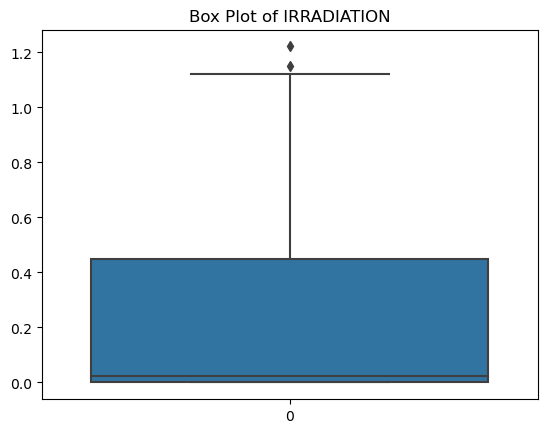

In [33]:
sns.boxplot(data=df2['IRRADIATION']).set(title="Box Plot of IRRADIATION")

In [34]:
IRR_describe = df2['IRRADIATION'].describe()
IQR_IRR = IRR_describe['75%'] - IRR_describe['25%']
lower_limit = IRR_describe['25%'] - 1.5*IQR_IRR
upper_limit = IRR_describe['75%'] + 1.5*IQR_IRR
outliers_IRR = df2[(df2['IRRADIATION'] < lower_limit) | (df2['IRRADIATION'] > upper_limit)]
len(outliers_IRR)

2

In [35]:
outliers_IRR

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1407,2020-05-30 12:00:00,27.092855,57.691178,1.151102
2854,2020-06-14 14:00:00,27.848916,59.386079,1.221652


In [37]:
ZSCORE_IRR = (df2['IRRADIATION'] - df2['IRRADIATION'].mean())/df2['IRRADIATION'].std()
outliers_IRR = df2[(ZSCORE_IRR < -3) | (ZSCORE_IRR > 3)]
len(outliers_IRR)

2

In [38]:
outliers_IRR

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1407,2020-05-30 12:00:00,27.092855,57.691178,1.151102
2854,2020-06-14 14:00:00,27.848916,59.386079,1.221652


result: there is 2 outliers on IRRADIATION (few)

on AMBIENT_TEMPERATURE

[Text(0.5, 1.0, 'Box Plot of AMBIENT_TEMPERATURE')]

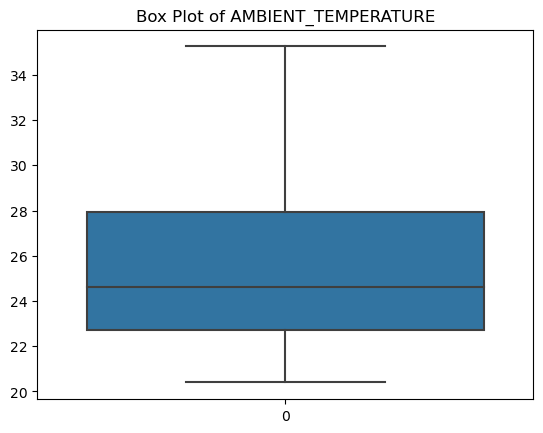

In [39]:
sns.boxplot(data=df2['AMBIENT_TEMPERATURE']).set(title="Box Plot of AMBIENT_TEMPERATURE")

In [40]:
temp_describe = df2['AMBIENT_TEMPERATURE'].describe()
IQR_temp = temp_describe['75%'] - temp_describe['25%']
lower_limit = temp_describe['25%'] - 1.5*IQR_temp
upper_limit = temp_describe['75%'] + 1.5*IQR_temp
outliers_temp = df2[(df2['AMBIENT_TEMPERATURE'] < lower_limit) | (df2['AMBIENT_TEMPERATURE'] > upper_limit)]
len(outliers_temp)

0

result: no outlier on AMBIENT_TEMPERATURE

on All

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df1.drop(columns=['DATE_TIME', 'SOURCE_KEY']))
df1_2 = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

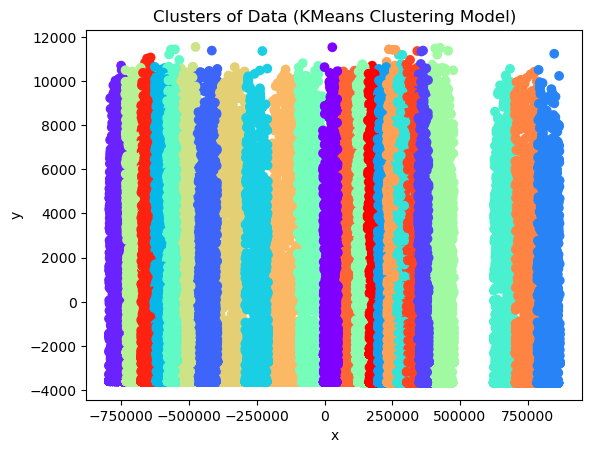

In [46]:
from sklearn.cluster import KMeans

kmeanModel = KMeans(n_clusters=24, random_state=0)
preds = kmeanModel.fit_predict(df1_2)
plt.scatter(df1_2['pc1'], df1_2['pc2'], c=kmeanModel.labels_, cmap='rainbow')
plt.title('Clusters of Data (KMeans Clustering Model)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

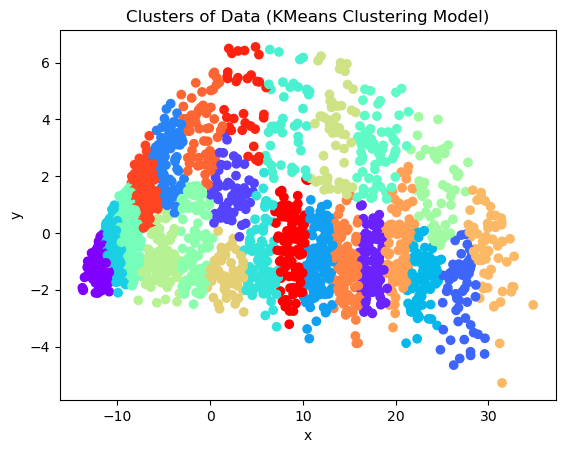

In [47]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df2.drop(columns=['DATE_TIME']))
df2_2 = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

kmeanModel = KMeans(n_clusters=24, random_state=0)
preds = kmeanModel.fit_predict(df2_2)
plt.scatter(df2_2['pc1'], df2_2['pc2'], c=kmeanModel.labels_, cmap='rainbow')
plt.title('Clusters of Data (KMeans Clustering Model)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### There is some hidden problem!!

In [29]:
df2['DATE'] = pd.to_datetime(df2['DATE_TIME']).dt.date
groupedDf2 = df2.groupby('DATE')
groupedDf2.size()

DATE
2020-05-15    93
2020-05-16    88
2020-05-17    96
2020-05-18    96
2020-05-19    93
2020-05-20    80
2020-05-21    68
2020-05-22    96
2020-05-23    90
2020-05-24    96
2020-05-25    96
2020-05-26    96
2020-05-27    96
2020-05-28    96
2020-05-29    79
2020-05-30    96
2020-05-31    96
2020-06-01    96
2020-06-02    96
2020-06-03    95
2020-06-04    96
2020-06-05    96
2020-06-06    96
2020-06-07    96
2020-06-08    96
2020-06-09    96
2020-06-10    96
2020-06-11    96
2020-06-12    96
2020-06-13    96
2020-06-14    96
2020-06-15    96
2020-06-16    96
2020-06-17    96
dtype: int64

برای هر روز باید 24 * 4 = 96 رکورد داشته باشیم ولی برای بعضی از روزها این مقدار کمتر است یعنی در بعضی از بازه های 15 دقیقه ای برای آن روز داده ثبت نشده است 

In [32]:
df1['DATE'] = pd.to_datetime(df1['DATE_TIME']).dt.date
groupedDf1 = df1.groupby('DATE')
groupedDf1.size()

DATE
2020-01-06    2112
2020-02-06    2088
2020-03-06    2094
2020-04-06    2052
2020-05-06    2080
2020-05-15    1954
2020-05-16    1934
2020-05-17    2112
2020-05-18    2112
2020-05-19    1990
2020-05-20    1672
2020-05-21    1368
2020-05-22    2028
2020-05-23    1958
2020-05-24    2112
2020-05-25    2060
2020-05-26    2072
2020-05-27    2052
2020-05-28    1980
2020-05-29    1490
2020-05-30    2112
2020-05-31    2106
2020-06-06    2052
2020-06-13    2112
2020-06-14    2112
2020-06-15    2112
2020-06-16    2112
2020-06-17    2068
2020-07-06    2112
2020-08-06    2112
2020-09-06    2112
2020-10-06    2112
2020-11-06    2112
2020-12-06    2112
dtype: int64

برای هر روز باید 24 * 4 * 22 = 2112 رکورد ثبت شده باشد ولی برای بعضی از روزها این مقدار کمتر است و این یعنی در بعضی از بازه های 15 دقیقه ای برای بعضی از اینورترها داده ثبت نشده است 

مشکل دیگری که در خروجی بالا مشاهده میشود مربوط به فرمت تاریخ هاست. این داده ها در بازه 34 روزه از 15 ماه پنجم تا 17 ماه ششم ثبت شده ولی در بعضی از روزها جای ماه و روز برعکس ثبت شده است. این موضوع را بیشتر بررسی میکنیم

In [33]:
print(gen_1.DATE_TIME[50000])
print(gen_1.DATE_TIME[10000])

2020-09-06 02:00:00
2020-05-19 22:45:00


با بررسی دو رکورد مختلف مشکل تاریخ مشخص است. تاریخ برای رکورد دوم درست ثبت شده و در رکورد اول جای ماه و روز باید تغییر کند (ششم ماه نهم در این بازه 34 روزه نیست)

ابتدا تابعی مینویسم و مشکل ذکر شده برای تاریخ را اصلاح میکنیم

In [34]:
def dateFormat(df):
    for i in range(len(df)):
        if (
            (df['DATE_TIME'][i].month != 6 and df['DATE_TIME'][i].month != 5)
            or (df['DATE_TIME'][i].month == 5 and df['DATE_TIME'][i].day == 6)
        ):
            old = df['DATE_TIME'][i]
            new = datetime(
                year=old.year,
                month=old.day,
                day=old.month, 
                hour=old.hour, 
                minute=old.minute, 
                second=old.second
            )
            
            #change datetime of i record from old to new
            df.loc[i, 'DATE_TIME'] = new
            #df.loc[i, 'DATE'] = pd.to_datetime(df['DATE_TIME'][i]).dt.date
            
        #end of if
    #end of for
    return df

In [37]:
formatDAteCorrect = dateFormat(df1)
formatDAteCorrect.drop(columns=['DATE'])
formatDAteCorrect['DATE'] = pd.to_datetime(formatDAteCorrect['DATE_TIME']).dt.date
groupedDf1 = formatDAteCorrect.groupby('DATE')
groupedDf1.size()

DATE
2020-05-15    1954
2020-05-16    1934
2020-05-17    2112
2020-05-18    2112
2020-05-19    1990
2020-05-20    1672
2020-05-21    1368
2020-05-22    2028
2020-05-23    1958
2020-05-24    2112
2020-05-25    2060
2020-05-26    2072
2020-05-27    2052
2020-05-28    1980
2020-05-29    1490
2020-05-30    2112
2020-05-31    2106
2020-06-01    2112
2020-06-02    2088
2020-06-03    2094
2020-06-04    2052
2020-06-05    2080
2020-06-06    2052
2020-06-07    2112
2020-06-08    2112
2020-06-09    2112
2020-06-10    2112
2020-06-11    2112
2020-06-12    2112
2020-06-13    2112
2020-06-14    2112
2020-06-15    2112
2020-06-16    2112
2020-06-17    2068
dtype: int64

حالا پس از اصلاح تاریخ، تمام داده ها در این بازه 34 روزه قرار دارند

همانطور که دیدیم در بعضی از بازه های 15 دقیقه و برای بعضی از اینورترها داده ثبت نشده است و به نوعی رکورد نال داریم. آنها را به گونه ای به داده ها اضافه میکنیم 

رکورد های مربوطه را برای داده های سنسور وارد میکنیم

In [38]:
def findNallSens(df):
    nallList = []
    df = df.sort_values(by=['DATE_TIME'])
    curr = df['DATE_TIME'].iloc[0]
    i = 1
    for itr in range(1, 4000): #not correct itr
        curr = curr + timedelta(minutes=15)
        
        print(i, curr, df['DATE_TIME'].iloc[i])
        
        if(curr != df['DATE_TIME'].iloc[i]):
            nallList.append(curr)
            
            #print('*********************null find', curr, df['DATE_TIME'][i])
            
            i = i - 1 #next add by 1 then i not chagne
            
        i = i + 1
        if(i == df.shape[0]):
            print('end of list', i , df.shape[0])
            break
    return nallList

In [39]:
def fillNallSens(nalls, df):
    #i = 1
    for nall in nalls:
        #print(nall)
        
        yesterday = nall - timedelta(days=1)
        yesterdayRecord = df.loc[df['DATE_TIME'] == yesterday]
        
        tomarrow = nall + timedelta(days=1)
        tomarrowRecord = df.loc[df['DATE_TIME'] == tomarrow]
        
        min15before = nall - timedelta(minutes=15)
        min15Record = df.loc[df['DATE_TIME'] == min15before]
        
        a=0.5
        b=0.25
        c=0.25
        newdf = pd.DataFrame()
        
        if(min15Record.shape[0] < 1):#delete later
            print('cant')
            #a = 1
        elif(yesterdayRecord.shape[0] < 1 and tomarrowRecord.shape[0] < 1):
            ##create new record
            newRecord = ({
                'DATE_TIME':[nall],
                'AMBIENT_TEMPERATURE' :[min15Record['AMBIENT_TEMPERATURE'].iloc[0]],
                'MODULE_TEMPERATURE':[min15Record['MODULE_TEMPERATURE'].iloc[0]],
                'IRRADIATION':[min15Record['IRRADIATION'].iloc[0]]
            })
            newdf = pd.DataFrame(newRecord)
        elif(yesterdayRecord.shape[0] < 1):
            ##create new record
            newRecord = ({
                'DATE_TIME':[nall],
                'AMBIENT_TEMPERATURE' :[0.75 * min15Record['AMBIENT_TEMPERATURE'].iloc[0] + 0.25 * tomarrowRecord['AMBIENT_TEMPERATURE'].iloc[0]],
                'MODULE_TEMPERATURE':[0.75 * min15Record['MODULE_TEMPERATURE'].iloc[0] + 0.25 * tomarrowRecord['MODULE_TEMPERATURE'].iloc[0]],
                'IRRADIATION':[0.75 * min15Record['IRRADIATION'].iloc[0] + 0.25 * tomarrowRecord['IRRADIATION'].iloc[0]]
            })
            newdf = pd.DataFrame(newRecord)
        elif(tomarrowRecord.shape[0] < 1):
            ##create new record
            newRecord = ({
                'DATE_TIME':[nall],
                'AMBIENT_TEMPERATURE' :[0.75 * min15Record['AMBIENT_TEMPERATURE'].iloc[0] + 0.25 * yesterdayRecord['AMBIENT_TEMPERATURE'].iloc[0]],
                'MODULE_TEMPERATURE':[0.75 * min15Record['MODULE_TEMPERATURE'].iloc[0] + 0.25 * yesterdayRecord['MODULE_TEMPERATURE'].iloc[0]],
                'IRRADIATION':[0.75 * min15Record['IRRADIATION'].iloc[0] + 0.25 * yesterdayRecord['IRRADIATION'].iloc[0]]
            })
            newdf = pd.DataFrame(newRecord)
        else:
            ##create new record
            newRecord = ({
                'DATE_TIME':[nall],
                'AMBIENT_TEMPERATURE' :[0.5 * min15Record['AMBIENT_TEMPERATURE'].iloc[0] + 0.25 * yesterdayRecord['AMBIENT_TEMPERATURE'].iloc[0] + 0.25 * tomarrowRecord['AMBIENT_TEMPERATURE'].iloc[0]],
                'MODULE_TEMPERATURE':[0.5 * min15Record['MODULE_TEMPERATURE'].iloc[0] + 0.25 * yesterdayRecord['MODULE_TEMPERATURE'].iloc[0] + 0.25 * tomarrowRecord['MODULE_TEMPERATURE'].iloc[0]],
                'IRRADIATION':[0.5 * min15Record['IRRADIATION'].iloc[0] + 0.25 * yesterdayRecord['IRRADIATION'].iloc[0] + 0.25 * tomarrowRecord['IRRADIATION'].iloc[0]]
            })
            newdf = pd.DataFrame(newRecord)
        
        df = pd.concat([newdf, df])   
        #if(min15Record.shape[0] >= 1):
            #print(nall)
            #print(min15Record['IRRADIATION'], min15Record['IRRADIATION']*2)
         #   print(newdf)
            
        #if(i==1):
         #   print(nall)
          #  return min15Record
           # break
        
        #print(newdf)
    return df

In [40]:
nallSens = findNallSens(df2) #times without record
completeSens = fillNallSens(nallSens, df2)

1 2020-05-15 00:15:00 2020-05-15 00:15:00
2 2020-05-15 00:30:00 2020-05-15 00:30:00
3 2020-05-15 00:45:00 2020-05-15 00:45:00
4 2020-05-15 01:00:00 2020-05-15 01:00:00
5 2020-05-15 01:15:00 2020-05-15 01:15:00
6 2020-05-15 01:30:00 2020-05-15 01:30:00
7 2020-05-15 01:45:00 2020-05-15 01:45:00
8 2020-05-15 02:00:00 2020-05-15 02:00:00
9 2020-05-15 02:15:00 2020-05-15 02:15:00
10 2020-05-15 02:30:00 2020-05-15 02:30:00
11 2020-05-15 02:45:00 2020-05-15 02:45:00
12 2020-05-15 03:00:00 2020-05-15 03:00:00
13 2020-05-15 03:15:00 2020-05-15 03:15:00
14 2020-05-15 03:30:00 2020-05-15 03:30:00
15 2020-05-15 03:45:00 2020-05-15 03:45:00
16 2020-05-15 04:00:00 2020-05-15 04:00:00
17 2020-05-15 04:15:00 2020-05-15 04:15:00
18 2020-05-15 04:30:00 2020-05-15 04:30:00
19 2020-05-15 04:45:00 2020-05-15 04:45:00
20 2020-05-15 05:00:00 2020-05-15 05:00:00
21 2020-05-15 05:15:00 2020-05-15 05:15:00
22 2020-05-15 05:30:00 2020-05-15 05:30:00
23 2020-05-15 05:45:00 2020-05-15 05:45:00
24 2020-05-15 06:00:

In [41]:
print(df2.shape)
print(completeSens.shape)

(3182, 5)
(3264, 5)


In [42]:
nallSens2 = findNallSens(completeSens)

1 2020-05-15 00:15:00 2020-05-15 00:15:00
2 2020-05-15 00:30:00 2020-05-15 00:30:00
3 2020-05-15 00:45:00 2020-05-15 00:45:00
4 2020-05-15 01:00:00 2020-05-15 01:00:00
5 2020-05-15 01:15:00 2020-05-15 01:15:00
6 2020-05-15 01:30:00 2020-05-15 01:30:00
7 2020-05-15 01:45:00 2020-05-15 01:45:00
8 2020-05-15 02:00:00 2020-05-15 02:00:00
9 2020-05-15 02:15:00 2020-05-15 02:15:00
10 2020-05-15 02:30:00 2020-05-15 02:30:00
11 2020-05-15 02:45:00 2020-05-15 02:45:00
12 2020-05-15 03:00:00 2020-05-15 03:00:00
13 2020-05-15 03:15:00 2020-05-15 03:15:00
14 2020-05-15 03:30:00 2020-05-15 03:30:00
15 2020-05-15 03:45:00 2020-05-15 03:45:00
16 2020-05-15 04:00:00 2020-05-15 04:00:00
17 2020-05-15 04:15:00 2020-05-15 04:15:00
18 2020-05-15 04:30:00 2020-05-15 04:30:00
19 2020-05-15 04:45:00 2020-05-15 04:45:00
20 2020-05-15 05:00:00 2020-05-15 05:00:00
21 2020-05-15 05:15:00 2020-05-15 05:15:00
22 2020-05-15 05:30:00 2020-05-15 05:30:00
23 2020-05-15 05:45:00 2020-05-15 05:45:00
24 2020-05-15 06:00:

In [43]:
print(len(nallSens))
print(len(nallSens2))

82
0


رکوردهای مربوطه را برای داده های جنریشن وارد میکنیم

In [44]:
def findNallGen(df):
    df = df.sort_values(by=['DATE_TIME'])
    grouped = df.groupby('DATE_TIME')
    nallList = []
    curr = df['DATE_TIME'].iloc[0]
    #print(grouped.groups.keys())
    for i in range(200000): #i not important
        #print(i)
        if curr in grouped.groups.keys():
            find = grouped.get_group(curr)
            if(len(find)!=22):
                print(curr, len(find))
                nallList.append(curr)
        else:
            print(curr, 0)
            nallList.append(curr)
            
        curr = curr + timedelta(minutes=15)
        
        if(curr>df['DATE_TIME'].iloc[len(df)-1]):
            break
    #end of for
    
    return nallList

In [45]:
def fillNallGen(nalls, df):
    grouped = df.groupby('DATE_TIME')
    sourceKeys = df.SOURCE_KEY.unique()
    groupLen=0
    groupSources = []
    find = []
    
    #print(len(nalls))
    for i in nalls: #i is datetime
        
        if i in grouped.groups.keys():
            #print('imcoplete')
            find = grouped.get_group(i)
            groupLen = len(find)
            groupSources = find.SOURCE_KEY
            groupSources = list(groupSources)
            #print(groupSources)
        else:
            groupLen = 0
            groupSources = [] #empty
            
        #print(i, groupLen)
        #return find
        
        for j in sourceKeys: #j is source key
            if j not in groupSources:
                if(groupLen!=0):
                    if(i.month != 5 and i.day != 15): #have yesterday
                        yesterday = i - timedelta(days=1)
                        yesterdayRecord = df.loc[(df['DATE_TIME'] == yesterday) & (df['SOURCE_KEY'] == j)]
                        
                        newDC = 0.5 * yesterdayRecord['DC_POWER'].iloc[0] + 0.5 * find['DC_POWER'].mean()
                        newAC = 0.5 * yesterdayRecord['AC_POWER'].iloc[0] + 0.5 * find['AC_POWER'].mean()
                        newDaily = 0.5 * yesterdayRecord['DAILY_YIELD'].iloc[0] + 0.5 * find['DAILY_YIELD'].mean()
                        newTotal = 0.5 * yesterdayRecord['TOTAL_YIELD'].iloc[0] + 0.5 * find['TOTAL_YIELD'].mean()
                    else: #dont have yesterday
                        newDC = find['DC_POWER'].mean()
                        newAC = find['AC_POWER'].mean()
                        newDaily = find['DAILY_YIELD'].mean()
                        newTotal = find['TOTAL_YIELD'].mean()
                        
                    newDateTime = i
                    newSource = j
                    
                else:
                    if(i.month != 5 and i.day != 15): #have yesterday
                        yesterday = i - timedelta(days=1)
                        yesterdayRecord = df.loc[(df['DATE_TIME'] == yesterday) & (df['SOURCE_KEY'] == j)]

                        newDC = yesterdayRecord['DC_POWER'].iloc[0]
                        newAC = yesterdayRecord['AC_POWER'].iloc[0]
                        newDaily = yesterdayRecord['DAILY_YIELD'].iloc[0]
                        newTotal = yesterdayRecord['TOTAL_YIELD'].iloc[0]
                    else:
                        
                        quarterBefore = i - timedelta(minutes=15)
                        qurtRecord = df.loc[(df['DATE_TIME'] == quarterBefore) & (df['SOURCE_KEY'] == j)]
                        
                        newDC = qurtRecord['DC_POWER'].iloc[0]
                        newAC = qurtRecord['AC_POWER'].iloc[0]
                        newDaily = qurtRecord['DAILY_YIELD'].iloc[0]
                        newTotal = qurtRecord['TOTAL_YIELD'].iloc[0]
                    
                    newDateTime = i
                    newSource = j
                    
                newRecord = ({
                    'DATE_TIME':[newDateTime],
                    'SOURCE_KEY' :[newSource],
                    'DC_POWER':[newDC],
                    'AC_POWER':[newAC],
                    'DAILY_YIELD':[newDaily],
                    'TOTAL_YIELD':[newTotal]
                })
                newdf = pd.DataFrame(newRecord)
                newdf['DATE'] = pd.to_datetime(newdf['DATE_TIME']).dt.date
                
                df = pd.concat([newdf, df]) 
            #end of if
        #end of for
    #end of for
    return df

In [46]:
nallGen = findNallGen(formatDAteCorrect) #times with less than 22 record
completeGen = fillNallGen(nallGen, formatDAteCorrect)

2020-05-15 00:00:00 21
2020-05-15 00:15:00 21
2020-05-15 00:30:00 21
2020-05-15 00:45:00 21
2020-05-15 01:15:00 21
2020-05-15 01:30:00 21
2020-05-15 02:00:00 21
2020-05-15 02:15:00 21
2020-05-15 02:30:00 21
2020-05-15 02:45:00 21
2020-05-15 03:00:00 21
2020-05-15 03:15:00 21
2020-05-15 03:30:00 21
2020-05-15 03:45:00 21
2020-05-15 04:00:00 21
2020-05-15 05:15:00 21
2020-05-15 05:30:00 21
2020-05-15 05:45:00 21
2020-05-15 06:00:00 21
2020-05-15 06:15:00 21
2020-05-15 19:00:00 14
2020-05-15 19:15:00 14
2020-05-15 19:30:00 14
2020-05-15 19:45:00 14
2020-05-15 20:00:00 14
2020-05-15 20:15:00 14
2020-05-15 20:30:00 14
2020-05-15 20:45:00 14
2020-05-15 21:00:00 14
2020-05-15 23:15:00 0
2020-05-15 23:30:00 0
2020-05-15 23:45:00 0
2020-05-16 00:00:00 0
2020-05-16 00:15:00 0
2020-05-16 00:30:00 0
2020-05-16 00:45:00 0
2020-05-16 01:00:00 0
2020-05-16 01:15:00 0
2020-05-16 01:30:00 0
2020-05-16 01:45:00 0
2020-05-16 02:00:00 20
2020-05-19 11:45:00 0
2020-05-19 12:00:00 0
2020-05-19 12:15:00 0
20

In [47]:
print(formatDAteCorrect.shape)
print(completeGen.shape)

(68778, 7)
(71808, 7)


In [48]:
nallGen2 = findNallGen(completeGen)

In [49]:
print(len(nallGen))
print(len(nallGen2))

207
0


ستون تاریخ را که برای تحلیل داده ها استفاده کردیم را حذف میکنیم

In [50]:
completeGen.drop(columns=['DATE'], inplace=True)
completeSens.drop(columns=['DATE'], inplace=True)

حالا داده های سنسور و جنریشن را مرج میکنیم

In [55]:
finalDF = pd.merge(completeGen, completeSens, on='DATE_TIME')

#sort and reindex
finalDF.sort_values(by=['DATE_TIME'], inplace=True)
finalDF = finalDF.reset_index()
finalDF.drop(columns=['index'], inplace=True)

In [56]:
print(finalDF.shape)
finalDF.head(3)

(71808, 9)


,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6.183645e+06,25.184316,22.857507,0.0
1,2020-05-15,YxYtjZvoooNbGkE,0.0,0.0,0.0,6.837223e+06,25.184316,22.857507,0.0
2,2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7.602960e+06,25.184316,22.857507,0.0


حالا کورلیشن بین ستونها را بررسی میکنیم

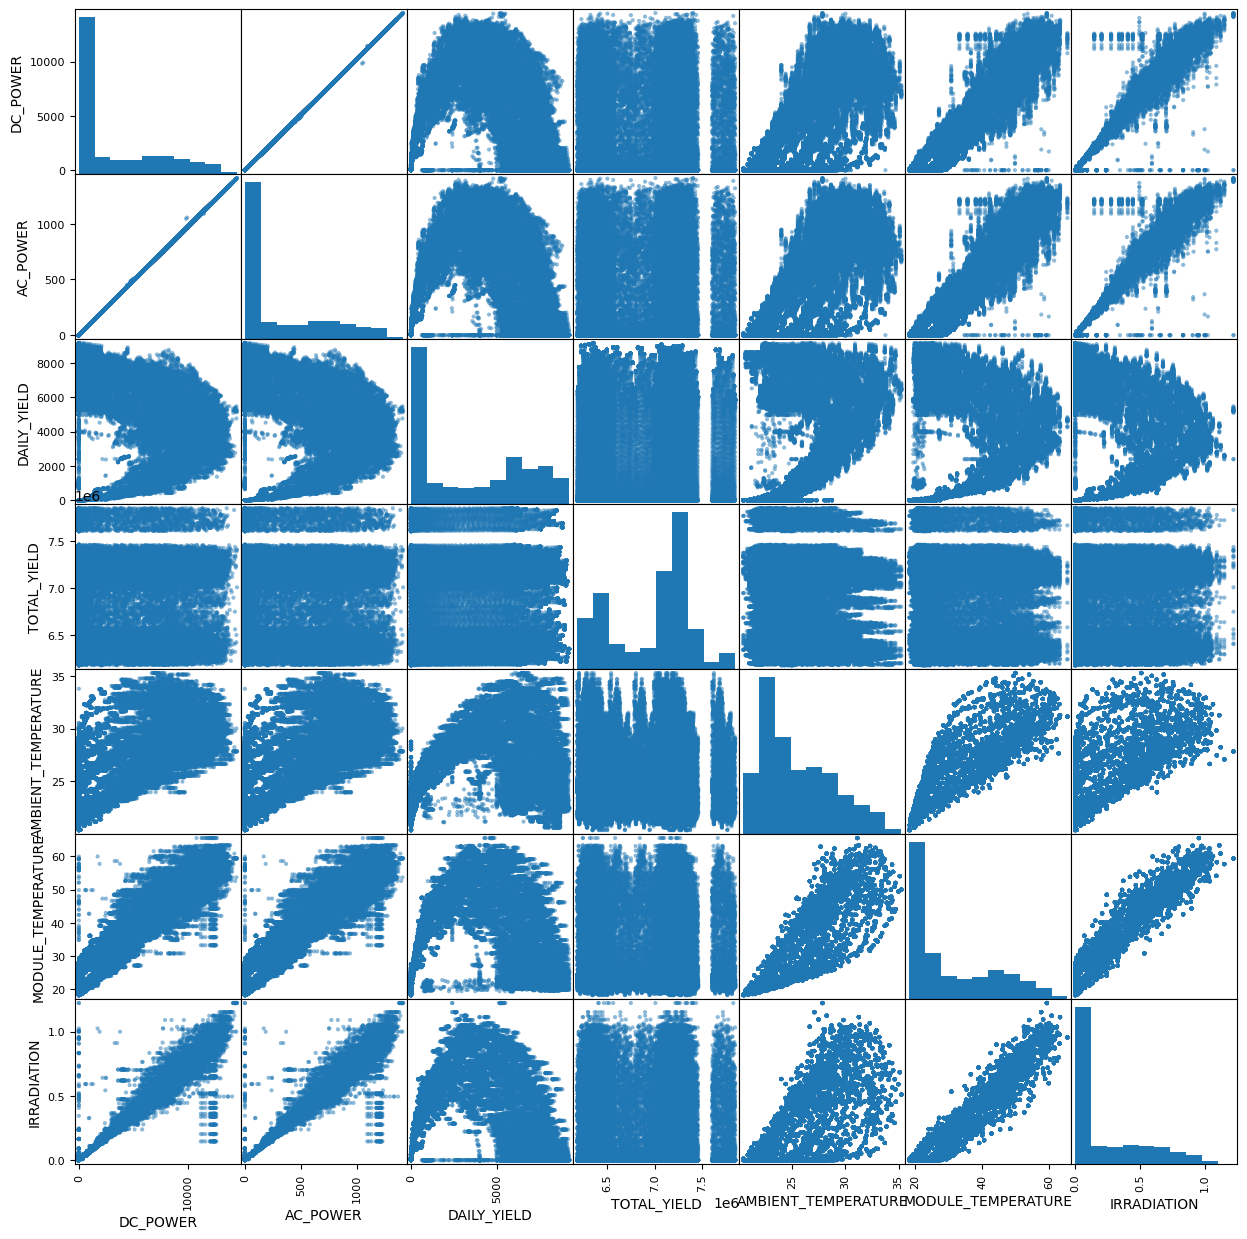

In [60]:
pd.plotting.scatter_matrix(finalDF, figsize=(15,15))
plt.show()

In [62]:
corr = finalDF.corr()
corr.style.background_gradient(cmap='coolwarm')

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DC_POWER,1.000000,0.999996,0.054778,0.006352,0.729097,0.952115,0.983778
AC_POWER,0.999996,1.000000,0.054685,0.006348,0.729330,0.952260,0.983773
DAILY_YIELD,0.054778,0.054685,1.000000,0.003920,0.426140,0.160042,0.048180
TOTAL_YIELD,0.006352,0.006348,0.003920,1.000000,-0.034470,-0.012157,-0.001855
AMBIENT_TEMPERATURE,0.729097,0.729330,0.426140,-0.034470,1.000000,0.856131,0.726685
MODULE_TEMPERATURE,0.952115,0.952260,0.160042,-0.012157,0.856131,1.000000,0.962001
IRRADIATION,0.983778,0.983773,0.048180,-0.001855,0.726685,0.962001,1.000000


همانطور که از خروجی های بالا مشخص است کورلیشن ای سی پاور و دی سی پاور زیاد است وو همچنین کورلیشن شدت تابش و دمای ماژول نیز زیاد است. البته زیاد بودن کورلیشن شدت تابش و دی سی و ای سی نیز قابل مشاهده است

پس با این وجود از ستون دمای ماژول استفاده نمکینم (به دلیل شباهت زیاد با شدت تابش) و همچنین برای پیشبینی تنها از لیبل ای سی استفاده میکنیم و دی سی را کنار میگذاریم (به دلیل شباهت زیاد به ای سی)

داده های کتگوریکال را به داده های عددی تبدیل میکنیم: تنها داده کتگوریکال مربوط به سورس کی است

In [63]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
finalDF['SOURCE_KEY'] = encoder.fit_transform(finalDF['SOURCE_KEY'])

حالا رکوردهایی که در نظر گرفته ایم را میسازیم

In [65]:
def createRecords(df):
    sourceKeys = df.SOURCE_KEY.unique()
    curr = df['DATE_TIME'].iloc[0]
    curr = curr + timedelta(days=3)
    createdDF = pd.DataFrame()
    for i in range(80000):
        print('time', curr)
        oneDayAgo = curr - timedelta(days=1)
        twoDayAgo = curr - timedelta(days=2)
        threeDayAgo = curr - timedelta(days=3)
        for j in sourceKeys:
            this = df.loc[(df['DATE_TIME'] == curr) & (df['SOURCE_KEY'] == j)]
            oneRec = df.loc[(df['DATE_TIME'] == oneDayAgo) & (df['SOURCE_KEY'] == j)]
            twoRec = df.loc[(df['DATE_TIME'] == twoDayAgo) & (df['SOURCE_KEY'] == j)]
            threeRec = df.loc[(df['DATE_TIME'] == threeDayAgo) & (df['SOURCE_KEY'] == j)]
            
            newDateTime = curr
            newSource = j
            newDaily1 = oneRec['DAILY_YIELD'].iloc[0]
            newTotal1 = oneRec['TOTAL_YIELD'].iloc[0]
            newTemp1  = oneRec['AMBIENT_TEMPERATURE'].iloc[0]
            newIrrad1 = oneRec['IRRADIATION'].iloc[0]
            newDaily2 = twoRec['DAILY_YIELD'].iloc[0]
            newTotal2 = twoRec['TOTAL_YIELD'].iloc[0]
            newTemp2  = twoRec['AMBIENT_TEMPERATURE'].iloc[0]
            newIrrad2 = twoRec['IRRADIATION'].iloc[0]
            newDaily3 = threeRec['DAILY_YIELD'].iloc[0]
            newTotal3 = threeRec['TOTAL_YIELD'].iloc[0]
            newTemp3  = threeRec['AMBIENT_TEMPERATURE'].iloc[0]
            newIrrad3 = threeRec['IRRADIATION'].iloc[0]
            label = this['AC_POWER'].iloc[0]
            
            newRecord = ({
                    'DATE_TIME':[newDateTime],
                    'SOURCE_KEY' :[newSource],
                    
                    'DAILY_Y1':[newDaily1],
                    'TOTAL_Y1':[newTotal1],
                    'AM_TEMP1':[newTemp1 ],
                    'IRRADIA1':[newIrrad1],
                
                    'DAILY_Y2':[newDaily2],
                    'TOTAL_Y2':[newTotal2],
                    'AM_TEMP2':[newTemp2 ],
                    'IRRADIA2':[newIrrad2],
                
                    'DAILY_Y3':[newDaily3],
                    'TOTAL_Y3':[newTotal3],
                    'AM_TEMP3':[newTemp3 ],
                    'IRRADIA3':[newIrrad3],
                
                    #'DC_POWER':[newDC],
                    'AC_POWER':[label],
                })
            newdf = pd.DataFrame(newRecord)
            #newdf['DATE'] = pd.to_datetime(newdf['DATE_TIME']).dt.date
            createdDF = pd.concat([newdf, createdDF]) 
        #end of for
        curr = curr + timedelta(minutes=15)
        if(curr > df['DATE_TIME'].iloc[len(df)-1]):
            break
    #end of for
    return createdDF

In [ ]:
createdDF = createRecords(finalDF)

In [ ]:
createdDF.sort_values(by=['DATE_TIME'], inplace=True)
createdDF = createdDF.reset_index()
createdDF.drop(columns=['index'], inplace=True)

In [ ]:
print(createdDF.shape, '\n********') # (34-3)*24*4*22=65472
createdDF.head(3)

In [ ]:
groupCreatedDf = createdDF.groupby(by=['DATE_TIME'])
print(len(groupCreatedDf.size())) # (34-3)*24*4=2976

In [ ]:
createdDF.to_csv('createdDF.csv', index=False)